# 06 Probability

For our purposes you should think of probability as a way of quantifying the uncertainty associated with events chosen from some universe of events.

Notationally, we write P(E) to mean “the probability of the event E.”
We’ll use probability theory to build models. We’ll use probability theory to
evaluate models. We’ll use probability theory all over the place.
One could, were one so inclined, get really deep into the philosophy of what probability theory means. (This is best done over beers.) We won’t be doing that.


## Dependence and Independence

Roughly speaking, we say that two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise, they are independent.
For instance, if we flip a fair coin twice, knowing whether the first flip is heads gives us no information about whether the second flip is heads. These events are independent. On the other hand, knowing whether the first flip is heads certainly gives us information about whether both flips are tails.

 (If the first flip is heads, then definitely it’s not the case that both flips are tails.) These two events are dependent.
Mathematically, we say that two events E and F are independent if the probability that they both happen is the product of the probabilities that each one happens:

$$
P(E, F) = P(E)P(F)
$$

In the example, the probability of “first flip heads” is 1/2, and the probability of “both flips tails” is 1/4, but the probability of “first flip heads and both flips tails” is 0.

## Conditional Probability


When two events E and F are independent, then by definition we have:

$$
P(E, F) = P(E)P(F)
$$

If they are not necessarily independent (and if the probability of F is not
zero), then we define the probability of E “conditional on F” as:

$$
P(E|F) = \frac{P(E, F)}{P(F)}
$$

You should think of this as the probability that E happens, given that we
know that F happens. We often rewrite this as:

$$
P(E, F) = P(E | F) P(F)
$$

When E and F are independent, you can check that this gives:

$$
P(E|F) = P(E)
$$

which is the mathematical way of expressing that knowing F occurred gives us no additional information about whether E occurred.

An example on a family givinf birth to two children, given the prob that being B or G is the same

In [4]:
import enum
import random

# an Enum is a typed set of enumared values we can use them
# to make our code more descriptive and readable
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
    

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])


both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for __ in range(0, 10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1


print('P(both | older):', both_girls / older_girl)
print('P(both | either):', both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


## Bayes Theorem

Bayes theorem is a way of "reversing" conditional probabilities.
Let's say we need to know the probability of some event E conditional
on some other event occurring.
But we only have information about the probability of F conditional on E
occurring. Using the definition of conditional probability twice tells us that:

$$
P(E|F) = P(E, F) / P(F) = P(F|E)P(E) / P(F)
$$

The event F can be split into the two mutually exclusive events "F and E" and
"F and not E". If we write ¬E for "not E" (i.e. "E doesn't happen"), then

$$
P(F) = P(F, E) + P(F, \neg E)
$$

So that:
$$
P(E, F) = P(F|E)P(E) / [P(F|E)P(E) + P(F|\neg E)P(\neg E)]
$$

which is how Bayes’s theorem is often stated.

This theorem often gets used to demonstrate why data scientists are smarter than doctors. Imagine a certain disease that affects 1 in every 10,000 people. And imagine that there is a test for this disease that gives the correct result (“diseased” if you have the disease, “nondiseased” if you don’t) 99% of the time.

What does a positive test mean? Let’s use T for the event “your test is positive” and D for the event “you have the disease.” Then Bayes’s theorem says that the probability that you have the disease, conditional on testing positive, is:

$$
P(D|T) = \frac{P(T|D)P(D)}{P(T|D)P(D) + P(T|\neg D)P(\neg D)}
$$

Here we know that $P(T|D)$, the probability that someone with the disease
tests positive, is 0.99. $P(D)$, the probability that any given person has the
disease is $1/10,000 = 0.0001$. $P(T|\neg D)$, the probability that someone 
without the disease tests positive, is 0.001. And $P(\neg D)$, the probability
that any given person doesn't have the disease, is 0.9999, If you substitute
these numbers into Bayes' theorem, you find:

$$
P(D|T) = 0.98\%
$$

That is, less than 1% of the people who test positive actually have the disease.

A more intuitive way to see this is to imagine a population of 1 million people. You’d expect 100 of them to have the disease, and 99 of those 100 to test positive. On the other hand, you’d expect 999,900 of them not to have the disease, and 9,999 of those to test positive. That means you’d expect only 99 out of (99 + 9999) positive testers to actually have the disease.

## Continuous Distributions

The density function for the uniform distribution is just:


In [6]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0


We will often be more interested in the cumulative distribution function (CDF), which gives the probability that a random variable is less than or equal to a certain value. 

In [7]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1

## Normal Distribution

The normal distribution is the classic bell curve–shaped distribution and is completely determined by two parameters: its mean μ (mu) and its standard deviation σ (sigma). The mean indicates where the bell is centered, and the standard deviation how “wide” it is.

It has de PDF:

$$
f(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma}}^{-\frac{(x-\mu)^2}{2\sigma ^2}}
$$

which we can implement as:

In [8]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float=0, sigma: float=1) -> float:
    return (
        math.exp(-(x - mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma)
    )

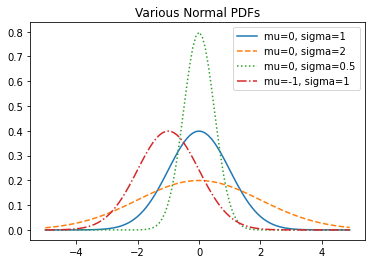

In [12]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various Normal PDFs')
plt.show()

When μ = 0 and σ = 1, it’s called the standard normal distribution. If Z is a standard normal random variable, then it turns out that:


$$ X = \sigma Z + \mu $$

is also normal but with mean and standard deviation . Conversely, if X is a normal random variable with mean and standard deviation ,

$$ Z = \frac{(X - \mu)}{\sigma} $$

is a standard normal variable.

The CDF for the normal distribution cannot be written in an “elementary”
manner, but we can write it using Python’s error function:


In [13]:
def normal_cdf(x:float, mu:float=0, sigma:float=1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

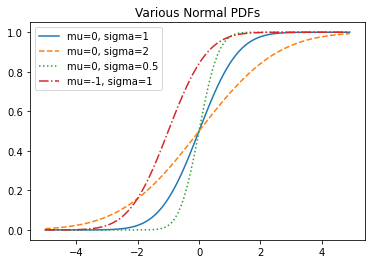

In [15]:
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various Normal PDFs')
plt.show()

Sometimes we'll need to invert `normal_cdf` to find the value corresponding
to a specified proability. There's no simple way to compute its inverse,
but `normal_cdf` is continuous and strictly increasing, so we can use a 
binary search:

In [16]:
def inverse_normal_cdf(p:float,
                       mu:float=0,
                       sigma:float=1,
                       tolerance:float=0.00001) -> float:
    """Find approximae inverse using binary search"""
    # if not standard, compute standard and re-scale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    return mid_z

The function repeatedly bisects intervals until it narrows in on a Z that’s close enough to the desired probability.

## Central Limit Theorem

One reason the normal distribution is so useful is the central limit theorem, which says (in essence) that a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.


In particular, if $x_1, ..., x_n$ are random variables with mean $\mu$ and standard deviation $\sigma$, and if $n$ is large, then:

$$
\frac{1}{n}(x_1 + ... + x_n)
$$

is approximately normally distributed with mean $\mu$ and standard deviation $\sigma / \sqrt{n}$. Equivalently (but often more usefully),

$$
\frac{(x_1 + ... + x_n) - \mu n}{\sigma \sqrt{n}}
$$

is approximately normally distributed with mean 0 and standard deviation 1.
An easy way to illustrate this is by looking at binomial random variables, which have two parameters n and p. A Binomial(n,p) random variable is
simply the sum of n independent Bernoulli(p) random variables, each of which equals 1 with probability p and 0 with probability 1 – p:

In [17]:
def bernoulli_trial(p:float) -> int:
    """Returns 1 with probability p and 0 with probability 1 - p"""
    return 1 if random.random() < p else 0


def binomial(n:int, p:float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for __ in range(0, n))

The mean of Bernoulli(p) variable is p, and its standard deviation is $ \sqrt{p(1-p)} $. The central limit theorem says that as n gets large, a Binomial(n,p) variable is approximately a normal random variable with mean $ \mu = np $ and 
standard deviation $ \sigma = \sqrt{np(1 - p)} $. If we plot both,
you can easilit see the resemblance:

In [18]:
from collections import Counter

def binomial_histogram(p:float, n:int, num_points:int) -> None:
    """Picks points from a Binomial(n,p) and plots their histogram"""
    data = [binomial(n,p) for __ in range(0, num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar(
        [x - 0.4 for x in histogram.keys()],
        [v / num_points for v in histogram.values()],
        0.8,
        color = '0.75'
    )
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomial Distribution vs. Normal Approximation')
    plt.show()

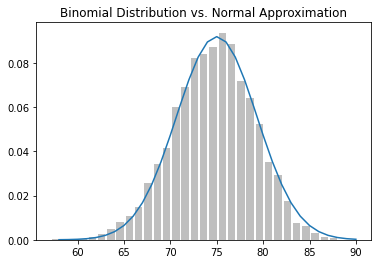

In [20]:
binomial_histogram(0.75, 100, 10000)